<a href="https://colab.research.google.com/github/Rachmatsyaifudin/0046-RF/blob/master/Cat_%26_Dog_Classification_using_Convolutional_Neural_Network_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [ ]:
from zipfile import ZipFile

data_path = 'dog-vs-cat-classification.zip'

with ZipFile(data_path, 'r') as zip:
	zip.extractall()
	print('The data set has been extracted.')


The data set has been extracted.


In [ ]:
path = 'dog-vs-cat-classification'
classes = os.listdir('dataset_cat_dog')
classes


['cats', 'dogs']

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('dog-vs-cat-classification/cats')
dog_dir = os.path.join('dog-vs-cat-classification/dogs')
cat_names = os.listdir('dataset_cat_dog')
dog_names = os.listdir('dataset_cat_dog')

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()


<Figure size 1600x1600 with 0 Axes>

In [ ]:
base_dir = 'dog-vs-cat-classification'

# Create datasets
train_datagen = image_dataset_from_directory('dataset_cat_dog',
												image_size=(200,200),
												subset='training',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)
test_datagen = image_dataset_from_directory('dataset_cat_dog',
												image_size=(200,200),
												subset='validation',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)


Found 838 files belonging to 2 classes.
Using 755 files for training.
Found 838 files belonging to 2 classes.
Using 83 files for validation.


In [ ]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

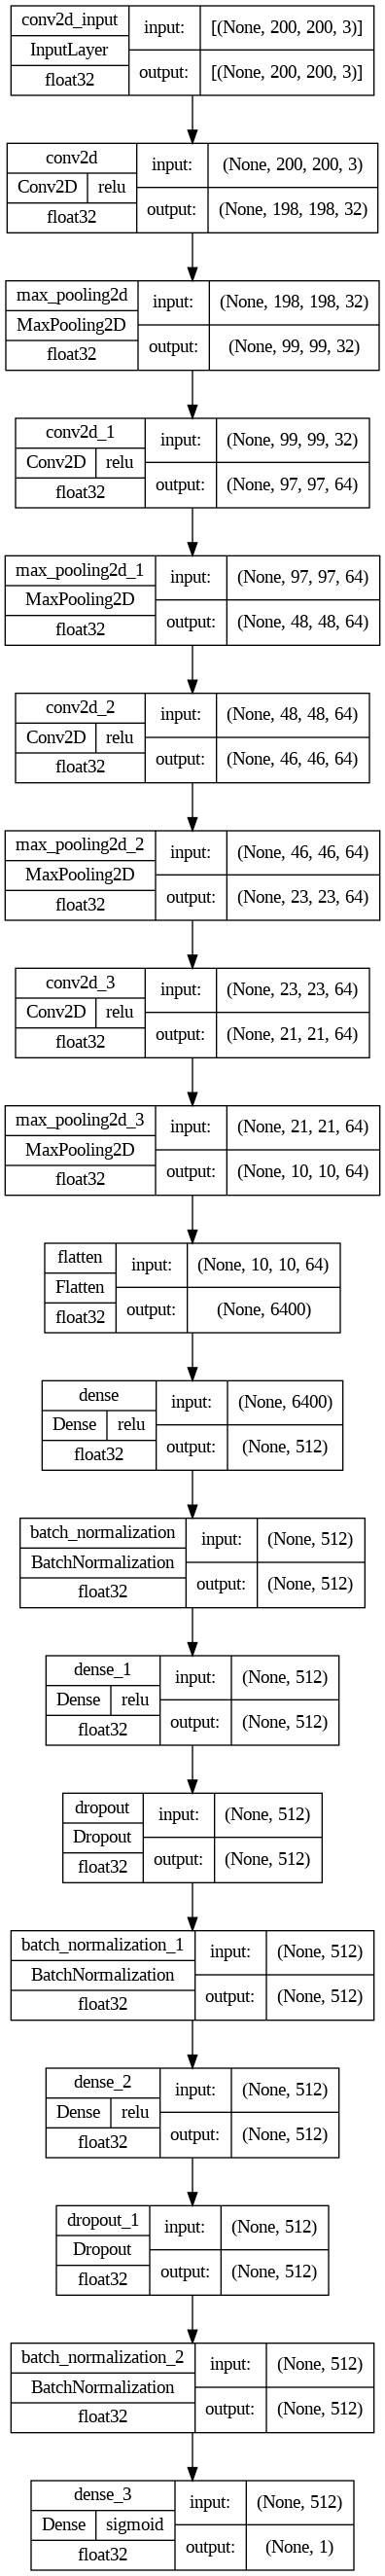

In [ ]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [ ]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)


In [ ]:
history = model.fit(train_datagen,
		epochs=10,
		validation_data=test_datagen)


Epoch 1/10
24/24 [==============================] - 71s 3s/step - loss: 0.5042 - accuracy: 0.7616 - val_loss: 1.1067 - val_accuracy: 0.6988
Epoch 2/10
24/24 [==============================] - 68s 3s/step - loss: 0.5285 - accuracy: 0.7656 - val_loss: 0.6508 - val_accuracy: 0.6867
Epoch 3/10
24/24 [==============================] - 68s 3s/step - loss: 0.3112 - accuracy: 0.8609 - val_loss: 0.8686 - val_accuracy: 0.7349
Epoch 4/10
24/24 [==============================] - 68s 3s/step - loss: 0.2976 - accuracy: 0.8781 - val_loss: 0.8782 - val_accuracy: 0.7590
Epoch 5/10
24/24 [==============================] - 68s 3s/step - loss: 0.3009 - accuracy: 0.8715 - val_loss: 2.1235 - val_accuracy: 0.6988
Epoch 6/10
24/24 [==============================] - 69s 3s/step - loss: 0.1805 - accuracy: 0.9298 - val_loss: 2.3078 - val_accuracy: 0.6867
Epoch 7/10
24/24 [==============================] - 68s 3s/step - loss: 0.1440 - accuracy: 0.9391 - val_loss: 2.0194 - val_accuracy: 0.6867
Epoch 8/10
24/24 [==

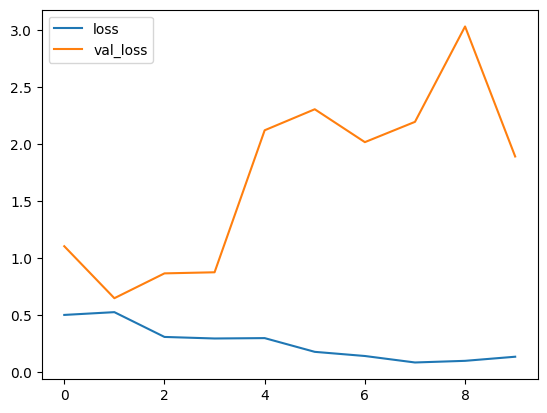

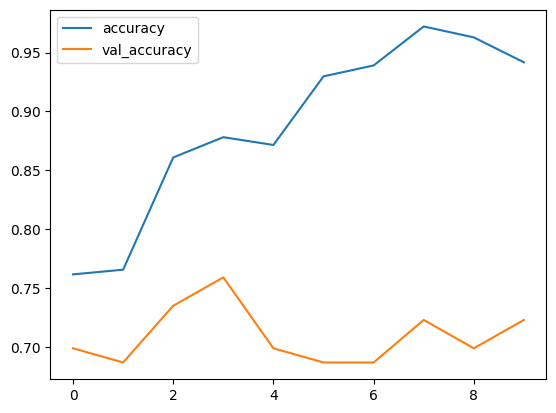

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


In [ ]:
import cv2


In [ ]:
test_img = cv2.imread('/content/cat.1.jpg')

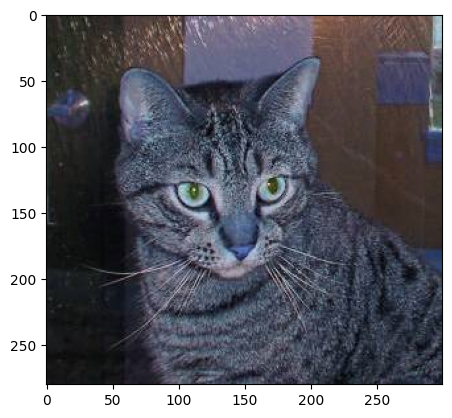

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(500, 469, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
test_img = cv2.imread('/content/dog.8.jpg')

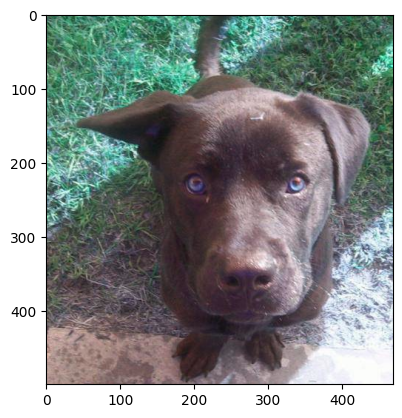

In [ ]:
plt.imshow(test_img)